## Assignment 3 Matplotlib

**Instructions:** <br>
a. write your answer after `# your answer here`. Do not delete any code that is in the cell, as the code facilitates checking your answers. If you happen to delete any code that prevents expected outputs, you may lose points. <br>
b. make sure the plot shows all the information necessary, including but not limited to **title, axis labels with units, legend**, etc. <br>
c. when you finish the assignment, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your assignment. <br>
d. upload your .ipynb file. <br>
<br>
Each subquestion for Question 1 and 2 is worth 5 points (30 points in total), and each subquestion for Question 3 is worth 10 points (30 points in total). The total score for assignment 3 is 60 points.

**Policy:** <br>
Assignment submitted late will receive a late penalty (30% point reduction), regardless of the reason. Empty assignment or no submission receives 0 point.

### Question 1
Load the following dataset from seaborn and use functions in seaborn to draw plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pg = sns.load_dataset("penguins")

1.(1) Data exploration: remove NA rows and draw pair plots (pairwise variable plots). Use different colors to denote different species.

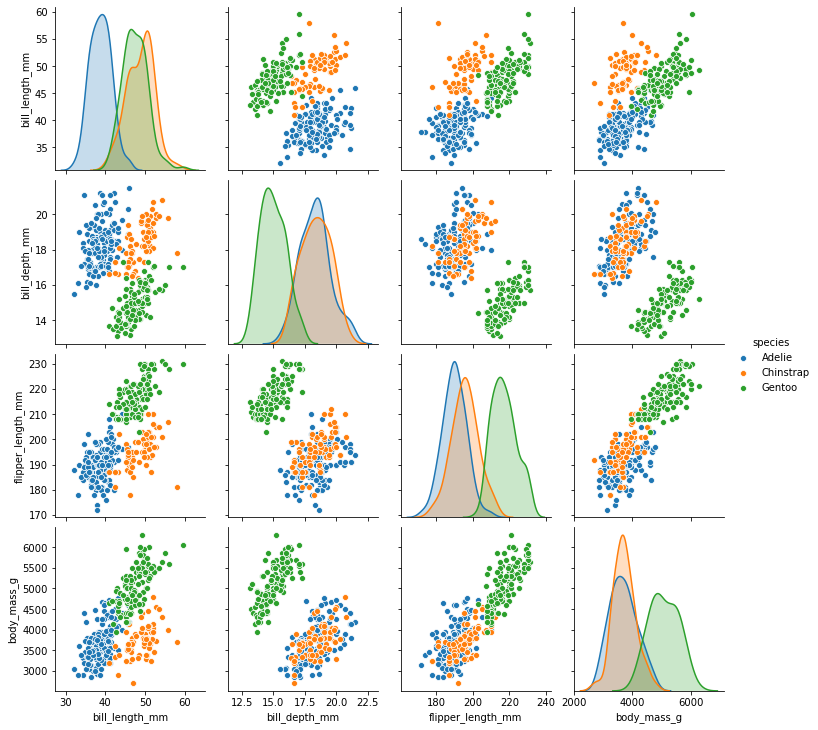

In [2]:
#your answer here
pg = pg.dropna()
pg
sns.pairplot(pg,hue="species");

1.(2) Draw violin plot on bill length over species, using different colors for the species.

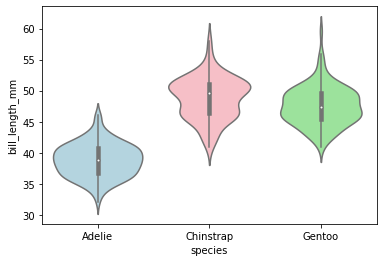

In [3]:
#your answer here
sns.violinplot("species", "bill_length_mm", data=pg,
               palette=["lightblue", "lightpink","lightgreen"]);

1.(3) Draw a joint density plot (kernel density estimate) of bill length and bill depth.

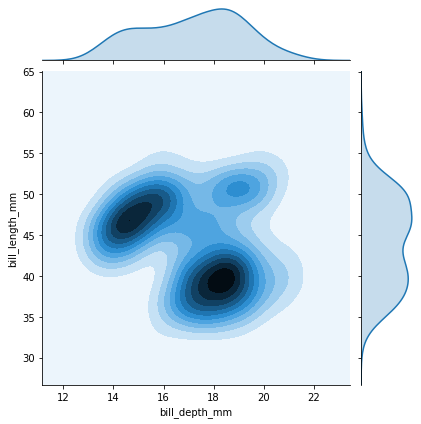

In [4]:
#your answer here
sns.jointplot("bill_depth_mm", "bill_length_mm", data=pg, 
              kind='kde');

1.(4) Draw a regression plot of bill length over body mass, which shows a scatterplot, a fitted line, and two histograms for the two variables.

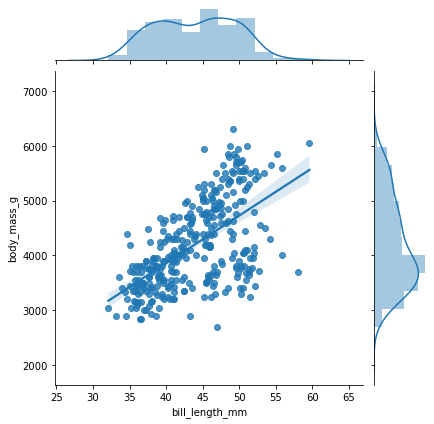

In [5]:
#your answer here
sns.jointplot("bill_length_mm", "body_mass_g", data=pg, kind='reg');

### Question 2
Load a dataset from Seaborn and answer the following questions.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
att = sns.load_dataset("attention")

2. (1) Draw a facet histogram, with two rows for the attention group and three columns for the solutions.

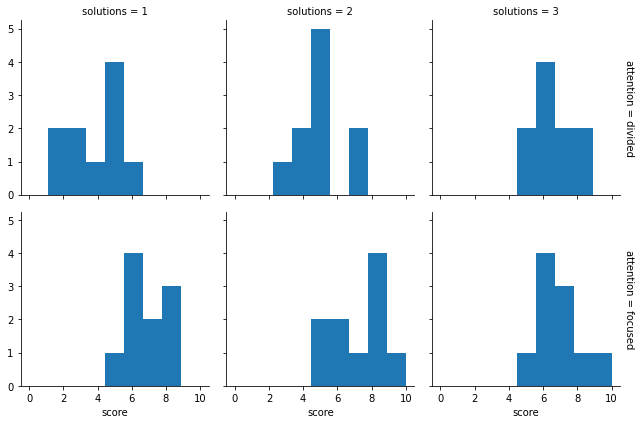

In [7]:
#your answer here
grid = sns.FacetGrid(att, row="attention", col="solutions", 
                     margin_titles=True)
grid.map(plt.hist, "score", 
         bins=np.linspace(0, 10, 10));

2. (2) Draw a factor boxplot of scores (y-axis) over attention group (x-axis). In each attention group, show the boxplot over the three solution groups (legend).

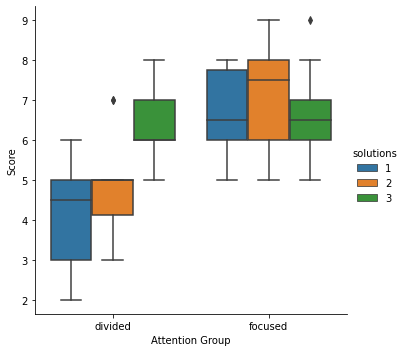

In [8]:
#your answer here
g = sns.catplot("attention", "score", 
                    "solutions", #legend group
                    data=att, kind="box")
g.set_axis_labels("Attention Group", "Score");

### Question 3

First, download the Olympic medal dataset (medals.csv). Use the following code to load the dataset.

The columns give information on: <br>
summer Olympic games--number of games and summer medals;  <br>
winter Olympic games--number of games and winter medals;  <br>
total Olympic games--number of games and total medals.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('medals.csv', index_col=0, skiprows=0)

3. (1) Plot a histogram on the total number of gold medals in summer and the total number of gold medals in winter in the range between 0 and 100 (do not include 0). 

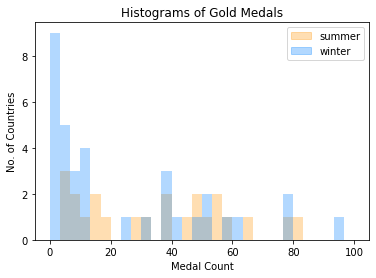

In [10]:
# Your answer here
df2 = df[:-1].copy()
df2 = df2[(df2['Gold'] > 0) & (df2['Gold.1'] > 0)]
kwargs = dict(histtype='stepfilled', #default:'bar' showing edges
              alpha=0.3, density=False, bins=30,range=(0,100))

cmap = plt.get_cmap('jet')
c1 = cmap(0.75)
c2 =cmap(0.25)

plt.hist(df2['Gold'], **kwargs, color=c1)
plt.hist(df2['Gold.1'], **kwargs, color=c2)

#create legend
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color=c,alpha=0.3) for c in [c1,c2]]
labels= ["summer","winter"]
plt.legend(handles, labels)

# Add title and axis names
plt.title('Histograms of Gold Medals')
plt.xlabel('Medal Count')
plt.ylabel('No. of Countries');

3. (2) For the top three countries with the largest number of combined medals (Combined Total), draw a line chart about the combined gold, silver, and bronze medals (Gold.2, Silver.2, Bronze.2). Use different styles for the line type, point type, color, and line width.

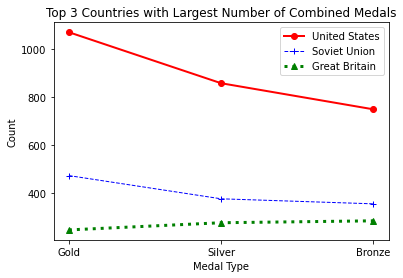

In [11]:
# Your answer here
df2 = df[:-1].copy().sort_values(by='Combined total',ascending=False) 
df3 = df2[['Gold.2','Silver.2','Bronze.2']][0:3]
xvals = range(3)

plt.plot(xvals, df3.iloc[0], '-or', lw=2, label=df3.index[0])
plt.plot(xvals, df3.iloc[1], '--+b', lw=1, label=df3.index[1])
plt.plot(xvals, df3.iloc[2], ':^g', lw=3, label=df3.index[2])

#axis labels
plt.xticks(xvals, ['Gold','Silver','Bronze'])

# Add title and axis names
plt.title('Top 3 Countries with Largest Number of Combined Medals')
plt.xlabel('Medal Type')
plt.ylabel('Count')

#create legend
plt.legend();

3. (3) For the top five countries with the largest number of combined medals (Combined Total), draw a stacked bar chart about the combined gold, silver, and bronze medals (Gold.2, Silver.2, Bronze.2).

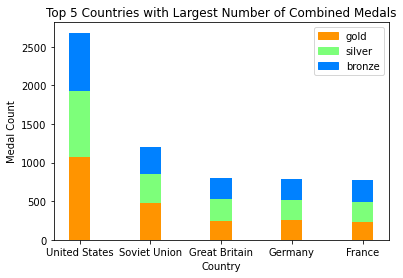

In [12]:
# Your answer here
df2 = df[:-1].copy().sort_values(by='Combined total',ascending=False) 
df3 = df2[['Gold.2','Silver.2','Bronze.2']][0:5]

cmap = plt.get_cmap('jet')
c1 = cmap(0.75)
c2 = cmap(0.50)
c3 = cmap(0.25)

xvals = range(5)
plt.bar(xvals, df3.iloc[:,0], width = 0.3, color = c1)
plt.bar(xvals, df3.iloc[:,1], bottom=df3.iloc[:,0], width = 0.3, color = c2)
plt.bar(xvals, df3.iloc[:,2], bottom=df3.iloc[:,0]+df3.iloc[:,1], width = 0.3, color = c3)

#axis labels
plt.xticks(xvals, df3.index)

# Add title and axis names
plt.title('Top 5 Countries with Largest Number of Combined Medals')
plt.xlabel('Country')
plt.ylabel('Medal Count')

#create legend
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color=c) for c in [c1,c2,c3]]
labels= ["gold","silver","bronze"]
plt.legend(handles, labels);